1. Clone from [github](https://github.com/Paperspace/DataAugmentationForObjectDetection), This job is to augment image from the datasets

In [1]:
import sys
from data_aug.data_aug import RandomHorizontalFlip, RandomHSV, RandomScale, RandomShear, Sequence

## Get Sticker

### Data augmentation flow

1. Input an Image

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt


origin.shape = (375, 500, 3), aug data shape = (346, 589, 3) 
[[ 81.02218411 158.69298939 317.12901619 304.46910755  12.        ]
 [175.96380876 130.09134595 270.55632876 262.02795922  14.        ]
 [331.57211368 185.44936551 383.24635871 305.39174121  14.        ]
 [301.23877354 182.68146453 348.44775738 303.54647389  14.        ]]


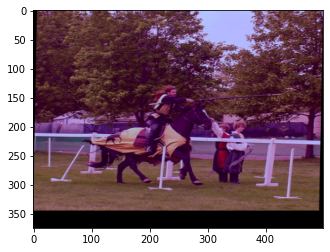

origin img shape: (375, 500, 3)
preprocessed img shape: (375, 500, 3)


In [16]:
import os
import cv2 as cv
import tensorflow as tf
import numpy as np
BACKGROUND_IMAGE_PATH = './dataset/VOCdevkit_train/VOC2007/JPEGImages/'
TEST_IMAGE_PATH = './dataset/VOCdevkit_train/VOC2007/JPEGImages/000009.jpg'
AUG_IMAGE_PATH = './dataset/VOCdevkit_train/VOC2007/JPEGImages_Aug/' # destination to save image
# files = [f for f in os.listdir(BACKGROUND_IMAGE_PATH) if os.path.isfile(os.path.join(BACKGROUND_IMAGE_PATH, f))]

# for f in files:
#     file_path = (BACKGROUND_IMAGE_PATH + f)
#     cv.imread(file_path)


seq = Sequence([RandomHSV(50,50,50),
                RandomHorizontalFlip(0.5),
                RandomScale(0.2, 2.0),
                RandomShear(0.1)])


test_img = tf.io.read_file(TEST_IMAGE_PATH)
img = tf.io.decode_jpeg(test_img, channels=3)
test_bboxes = np.array([[69,172,270,330,12],[150,141,229,284,14],[285,201,327,331,14],[258,198,297,329,14]]).astype(float)
new_img, new_bboxes = seq(img.numpy().copy(), test_bboxes.copy())
# plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))
print(new_bboxes)
plt.imshow(new_img)
plt.show()
print('origin img shape:', img.shape)
print('preprocessed img shape:', new_img.shape)

